# LSTM 기반 예측



# ✅ 🔹 LSTM 기반 테슬라 주가 예측 코드

[*********************100%***********************]  1 of 1 completed

Epoch 1/100



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2134 - val_loss: 0.1010
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1586 - val_loss: 0.0447
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1340 - val_loss: 0.0120
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1031 - val_loss: 0.0042
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0889 - val_loss: 0.0084
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0690 - val_loss: 0.0106
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0644 - val_loss: 0.0091
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0658 - val_loss: 0.0077
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0608 - val_loss: 0.0056
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0541 - val_loss: 0.0046
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0526 - val_loss: 0.0038
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0499 - val_l

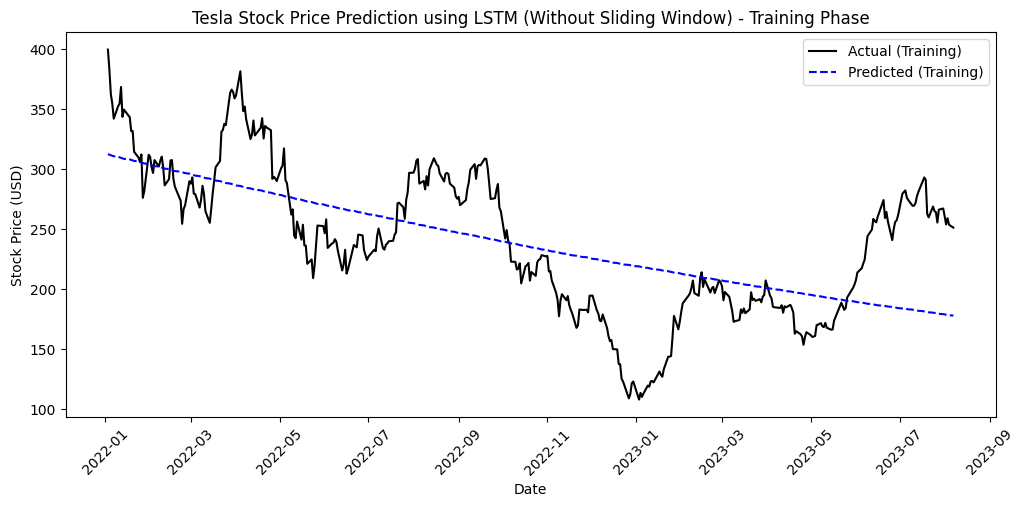

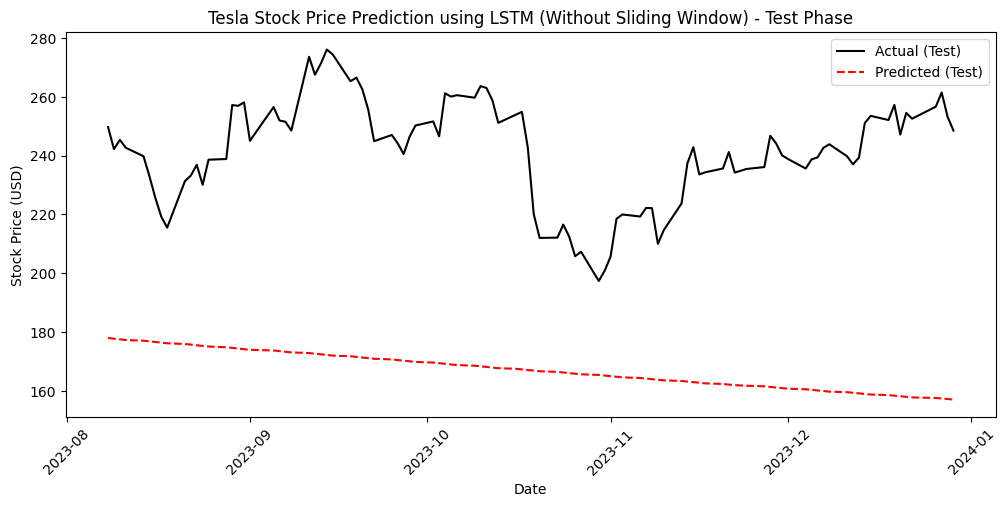

In [4]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 📌 1️⃣ 테슬라(TSLA) 주가 데이터 다운로드 (최근 2년치)
df = yf.download("TSLA", start="2022-01-01", end="2024-01-01")
df = df.reset_index()

# 📌 2️⃣ Feature 생성: 날짜(Day)를 숫자로 변환
df["Day"] = np.arange(len(df))

# 📌 3️⃣ 독립 변수(X) 및 종속 변수(y) 정의
X = df[["Day"]].values  # 날짜(Day)를 입력 변수로 사용
y = df["Close"].values  # 종가(Close)를 예측할 목표 변수로 사용

# 데이터 정규화 (MinMaxScaler 사용)
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

# 📌 4️⃣ 데이터 분할 (80% 학습, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, shuffle=False)

# LSTM 입력 형식 변환 (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], 1, 1)
X_test = X_test.reshape(X_test.shape[0], 1, 1)

# 📌 5️⃣ LSTM 모델 생성
model = Sequential([
    LSTM(50, activation='relu', input_shape=(1, 1)),  # LSTM 레이어
    Dense(1)  # 출력층
])

# 모델 컴파일 (손실함수: MSE, 최적화 알고리즘: Adam)
model.compile(optimizer='adam', loss='mse')

# 📌 6️⃣ 모델 학습
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# 📌 7️⃣ 예측 수행
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 예측 데이터 역정규화
y_train_pred = scaler_y.inverse_transform(y_train_pred)
y_test_pred = scaler_y.inverse_transform(y_test_pred)
y_train_actual = scaler_y.inverse_transform(y_train.reshape(-1, 1))
y_test_actual = scaler_y.inverse_transform(y_test.reshape(-1, 1))

# 📌 8️⃣ 성능 평가
train_mse = mean_squared_error(y_train_actual, y_train_pred)
test_mse = mean_squared_error(y_test_actual, y_test_pred)
train_r2 = r2_score(y_train_actual, y_train_pred)
test_r2 = r2_score(y_test_actual, y_test_pred)

print(f"📌 Training MSE: {train_mse:.4f}, R²: {train_r2:.4f}")
print(f"📌 Test MSE: {test_mse:.4f}, R²: {test_r2:.4f}")

# 📌 9️⃣ 결과 시각화 (훈련 데이터 예측 vs 실제값)
plt.figure(figsize=(12, 5))
plt.plot(df["Date"].iloc[:len(X_train)], y_train_actual, label="Actual (Training)", color="black")
plt.plot(df["Date"].iloc[:len(X_train)], y_train_pred, label="Predicted (Training)", color="blue", linestyle="--")
plt.title("Tesla Stock Price Prediction using LSTM (Without Sliding Window) - Training Phase")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.show()

# 📌 🔟 결과 시각화 (테스트 데이터 예측 vs 실제값)
plt.figure(figsize=(12, 5))
plt.plot(df["Date"].iloc[len(X_train):], y_test_actual, label="Actual (Test)", color="black")
plt.plot(df["Date"].iloc[len(X_train):], y_test_pred, label="Predicted (Test)", color="red", linestyle="--")
plt.title("Tesla Stock Price Prediction using LSTM (Without Sliding Window) - Test Phase")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.show()


#✅ 🚀 Sliding Window 적용된 LSTM 기반 테슬라 주가 예측 코드:

[*********************100%***********************]  1 of 1 completed

Epoch 1/100



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.1455 - val_loss: 0.0110
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0096 - val_loss: 0.0024
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0046 - val_loss: 0.0025
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0048 - val_loss: 0.0024
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0049 - val_loss: 0.0032
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0049 - val_loss: 0.0022
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0042 - val_loss: 0.0022
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0042 - val_loss: 0.0024
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0042 - val_loss: 0.0020
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0035 - val_loss: 0.0019
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0036 - val_loss: 0.0021
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0

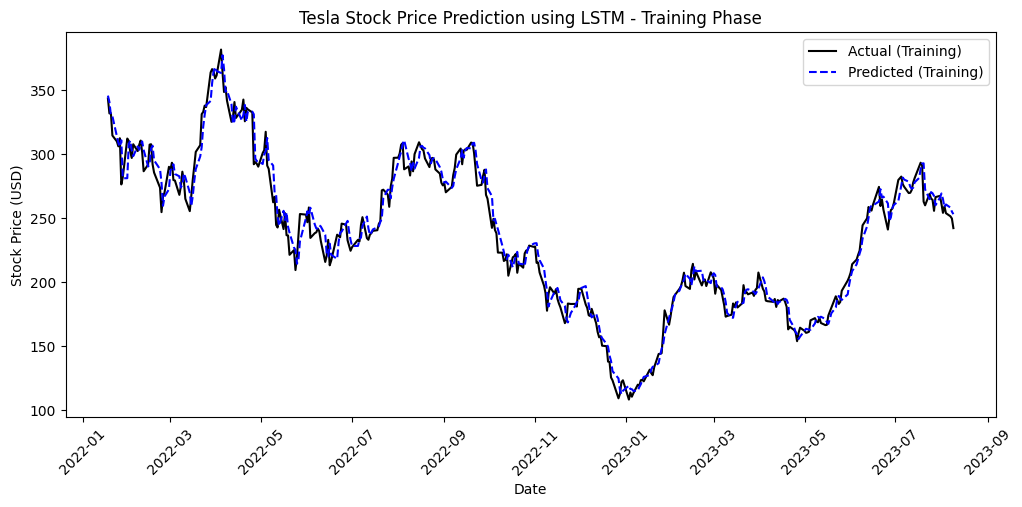

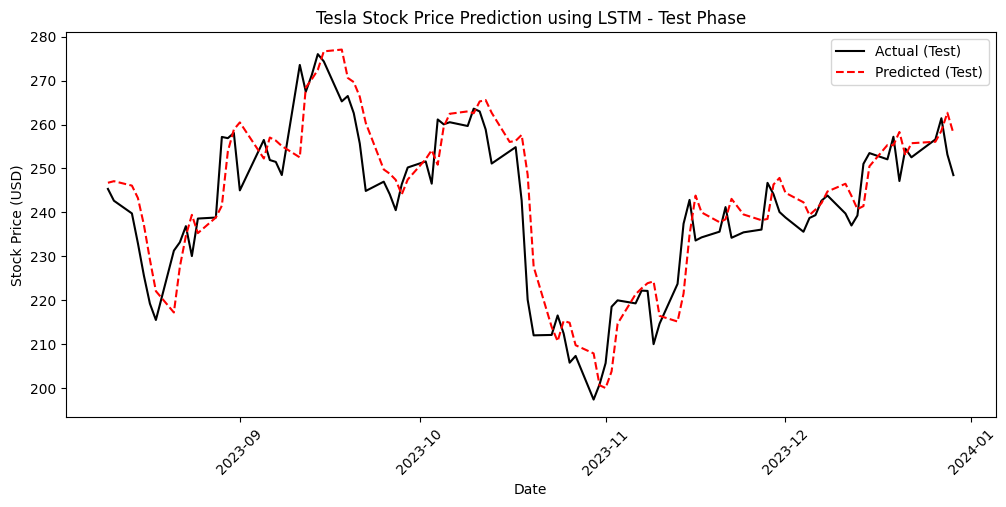

In [3]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 📌 1️⃣ 테슬라(TSLA) 주가 데이터 다운로드 (최근 2년치)
df = yf.download("TSLA", start="2022-01-01", end="2024-01-01")
df = df.reset_index()

# 📌 2️⃣ 슬라이딩 윈도우 함수 생성
def create_sliding_window_data(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i : i + window_size])  # 과거 window_size만큼의 데이터
        y.append(data[i + window_size])  # 예측할 값 (다음날 종가)
    return np.array(X), np.array(y)

# 📌 3️⃣ 데이터 정규화 (MinMaxScaler 사용)
scaler = MinMaxScaler()
scaled_close = scaler.fit_transform(df["Close"].values.reshape(-1, 1))

# 슬라이딩 윈도우 적용
window_size = 10  # 과거 10일 데이터로 미래 1일 예측
X, y = create_sliding_window_data(scaled_close, window_size)

# 📌 4️⃣ 데이터 분할 (80% 학습, 20% 테스트)
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# 입력 데이터를 LSTM 입력 형식 (samples, time steps, features)으로 변환
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# 📌 5️⃣ LSTM 모델 생성
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(window_size, 1)),  # 첫 번째 LSTM 레이어
    LSTM(50, activation='relu', return_sequences=False),  # 두 번째 LSTM 레이어
    Dense(1)  # 출력층
])

# 모델 컴파일 (손실함수: MSE, 최적화 알고리즘: Adam)
model.compile(optimizer='adam', loss='mse')

# 📌 6️⃣ 모델 학습
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# 📌 7️⃣ 예측 수행
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 예측 데이터 역정규화
y_train_pred = scaler.inverse_transform(y_train_pred)
y_test_pred = scaler.inverse_transform(y_test_pred)
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# 📌 8️⃣ 성능 평가
train_mse = mean_squared_error(y_train_actual, y_train_pred)
test_mse = mean_squared_error(y_test_actual, y_test_pred)
train_r2 = r2_score(y_train_actual, y_train_pred)
test_r2 = r2_score(y_test_actual, y_test_pred)

print(f"📌 Training MSE: {train_mse:.4f}, R²: {train_r2:.4f}")
print(f"📌 Test MSE: {test_mse:.4f}, R²: {test_r2:.4f}")

# 📌 9️⃣ 결과 시각화 (훈련 데이터 예측 vs 실제값)
plt.figure(figsize=(12, 5))
plt.plot(df["Date"].iloc[window_size:split_index+window_size], y_train_actual, label="Actual (Training)", color="black")
plt.plot(df["Date"].iloc[window_size:split_index+window_size], y_train_pred, label="Predicted (Training)", color="blue", linestyle="--")
plt.title("Tesla Stock Price Prediction using LSTM - Training Phase")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.show()

# 📌 🔟 결과 시각화 (테스트 데이터 예측 vs 실제값)
plt.figure(figsize=(12, 5))
plt.plot(df["Date"].iloc[split_index+window_size:], y_test_actual, label="Actual (Test)", color="black")
plt.plot(df["Date"].iloc[split_index+window_size:], y_test_pred, label="Predicted (Test)", color="red", linestyle="--")
plt.title("Tesla Stock Price Prediction using LSTM - Test Phase")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.show()


# ✅ 🚀 하이퍼파라미터 튜닝이 적용된 LSTM 기반 테슬라 주가 예측 코드

In [5]:
!pip install keras-tuner --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.5 MB/s eta 0:00:00


Trial 10 Complete [00h 01m 02s]
val_loss: 0.0009342207340523601

Best val_loss So Far: 0.0008396231569349766
Total elapsed time: 00h 11m 26s
📌 최적의 하이퍼파라미터: {'units': 80, 'activation': 'relu', 'learning_rate': 0.001}
Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.1613 - val_loss: 0.0024
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0106 - val_loss: 0.0019
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0045 - val_loss: 0.0020
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0033 - val_loss: 0.0025
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0030 - val_loss: 0.0018
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0036 - val_loss: 0.0019
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0026 - val_loss: 0.0017
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0028 - val_loss: 0.0017
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0029 - val_loss: 0.0016
Epoch 10/10

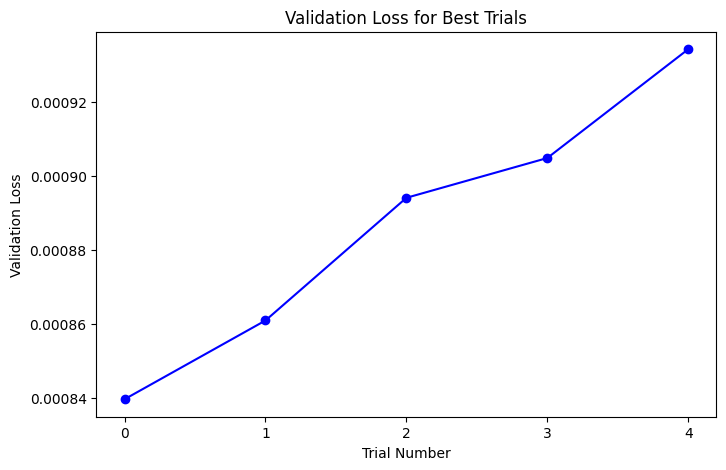

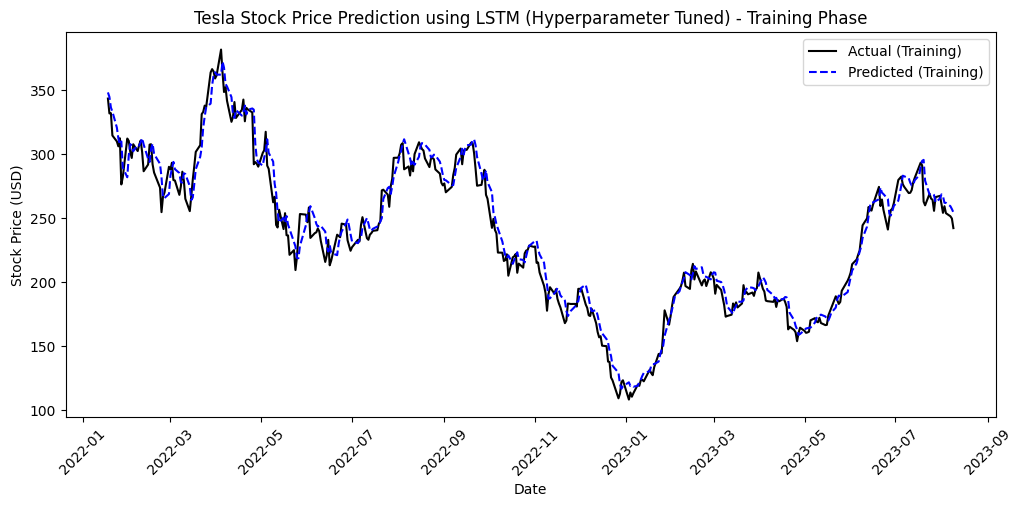

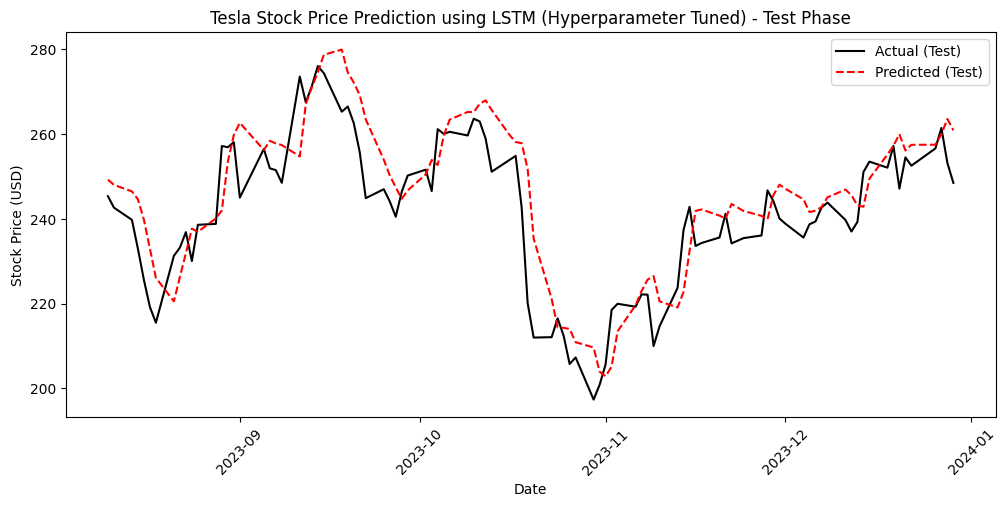

In [6]:
import os
import shutil
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import tensorflow as tf
import keras_tuner as kt  # KerasTuner 추가
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

# ✅ 📌 기존 하이퍼파라미터 튜닝 파일 삭제 (새로운 탐색을 위해)
tuner_dir = "hyperparameter_tuning/Tesla_LSTM_Tuning"
shutil.rmtree(tuner_dir, ignore_errors=True)

# 📌 1️⃣ 테슬라(TSLA) 주가 데이터 다운로드 (최근 2년치)
df = yf.download("TSLA", start="2022-01-01", end="2024-01-01")
df = df.reset_index()

# 📌 2️⃣ 입력 변수(X) 및 출력 변수(y) 생성 (슬라이딩 윈도우)
window_size = 10  # 과거 10일치 데이터를 입력으로 사용

def create_sliding_window_data(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i : i + window_size])  # window_size 만큼의 과거 데이터
        y.append(data[i + window_size])  # 다음날 주가 (타겟)
    return np.array(X), np.array(y)

# `Close`(종가) 데이터를 정규화
scaler = MinMaxScaler()
scaled_close = scaler.fit_transform(df["Close"].values.reshape(-1, 1))

# Sliding Window 적용
X, y = create_sliding_window_data(scaled_close, window_size)

# 📌 3️⃣ 데이터 분할 (80% 학습, 20% 테스트)
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# 입력 데이터를 LSTM 입력 형식 (samples, time steps, features)으로 변환
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# 📌 4️⃣ 하이퍼파라미터 튜닝을 위한 모델 정의
def build_model(hp):
    model = Sequential()

    # ✅ LSTM 레이어 유닛 수 최적화
    model.add(LSTM(
        hp.Int('units', min_value=16, max_value=128, step=16),
        activation=hp.Choice('activation', values=['relu', 'tanh']),
        input_shape=(window_size, 1)
    ))

    model.add(Dense(1))  # 출력층

    # ✅ 학습률 최적화
    model.compile(
        optimizer=Adam(hp.Choice('learning_rate', values=[0.001, 0.0005, 0.0001])),
        loss='mse'
    )

    return model

# 📌 5️⃣ KerasTuner를 사용한 하이퍼파라미터 튜닝
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,  # 시도할 모델 개수 증가
    executions_per_trial=3,  # 여러 번 실행 후 최적값 선택
    directory='hyperparameter_tuning',
    project_name='Tesla_LSTM_Tuning'
)

# 📌 6️⃣ 최적의 하이퍼파라미터 찾기
tuner.search(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# 📌 7️⃣ 최적 모델 선택
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"📌 최적의 하이퍼파라미터: {best_hps.values}")

best_model = tuner.hypermodel.build(best_hps)

# 📌 8️⃣ 최적 모델 학습
history = best_model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# 📌 🔟 예측 수행
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# ✅ 📌 예측 데이터 역정규화
y_train_pred = scaler.inverse_transform(y_train_pred)
y_test_pred = scaler.inverse_transform(y_test_pred)
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# 📌 1️⃣1️⃣ 성능 평가
train_mse = mean_squared_error(y_train_actual, y_train_pred)
test_mse = mean_squared_error(y_test_actual, y_test_pred)
train_r2 = r2_score(y_train_actual, y_train_pred)
test_r2 = r2_score(y_test_actual, y_test_pred)

print(f"📌 Training MSE: {train_mse:.4f}, R²: {train_r2:.4f}")
print(f"📌 Test MSE: {test_mse:.4f}, R²: {test_r2:.4f}")

# 📌 1️⃣2️⃣ 최적 하이퍼파라미터 성능 시각화
best_trials = tuner.oracle.get_best_trials(num_trials=5)
trial_numbers = range(len(best_trials))
val_losses = [trial.metrics.get_best_value('val_loss') for trial in best_trials]

plt.figure(figsize=(8, 5))
plt.plot(trial_numbers, val_losses, marker='o', linestyle='-', color="blue")
plt.xlabel("Trial Number")
plt.ylabel("Validation Loss")
plt.title("Validation Loss for Best Trials")
plt.xticks(trial_numbers)
plt.show()

# 📌 1️⃣3️⃣ 결과 시각화 (훈련 데이터 예측 vs 실제값)
plt.figure(figsize=(12, 5))
plt.plot(df["Date"].iloc[window_size:split_index+window_size], y_train_actual, label="Actual (Training)", color="black")
plt.plot(df["Date"].iloc[window_size:split_index+window_size], y_train_pred, label="Predicted (Training)", color="blue", linestyle="--")
plt.title("Tesla Stock Price Prediction using LSTM (Hyperparameter Tuned) - Training Phase")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.show()

# 📌 1️⃣4️⃣ 결과 시각화 (테스트 데이터 예측 vs 실제값)
plt.figure(figsize=(12, 5))
plt.plot(df["Date"].iloc[split_index+window_size:], y_test_actual, label="Actual (Test)", color="black")
plt.plot(df["Date"].iloc[split_index+window_size:], y_test_pred, label="Predicted (Test)", color="red", linestyle="--")
plt.title("Tesla Stock Price Prediction using LSTM (Hyperparameter Tuned) - Test Phase")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.show()
